<a href="https://colab.research.google.com/github/kapibara3chi/ReinforcementLearning/blob/main/ReinfoecementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simple Sample

## pip

In [20]:
!pip install gym-anytrading
!pip install yfinance

## code

[*********************100%%**********************]  1 of 1 completed


               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2023-01-04  21395.0  21650.0  20975.0  21150.0  20984.277344   8868500
2023-01-05  21650.0  22060.0  21330.0  21655.0  21485.320312  10631000
2023-01-06  21310.0  22120.0  21150.0  22030.0  21857.380859   9423800
2023-01-10  22970.0  23140.0  22450.0  23010.0  22829.703125   8432200
2023-01-11  23415.0  24015.0  23300.0  23950.0  23762.337891   8064900
Info: {'total_reward': 16400.0, 'total_profit': 0.5656829700615645, 'position': <Positions.Short: 0>}
trades:[{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}, {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}, {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}, {'total_reward': 1085.0, 'total_profit': 1.0273025894445542, 'position': <Positions.Short: 0>}, {'total_reward': 1085.0, 'total_profit': 1.0273025894445542, 'posi

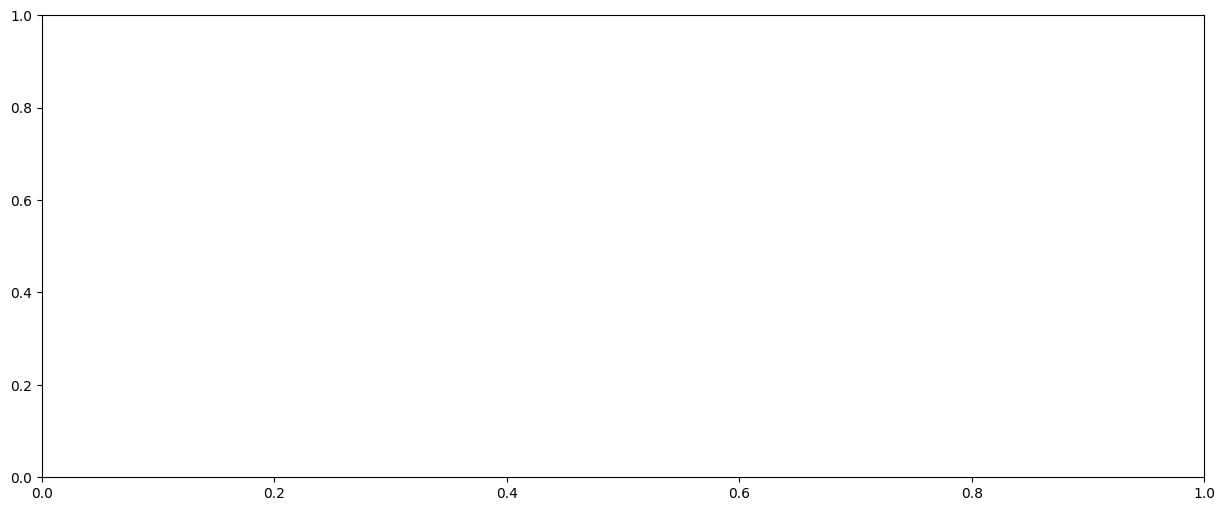

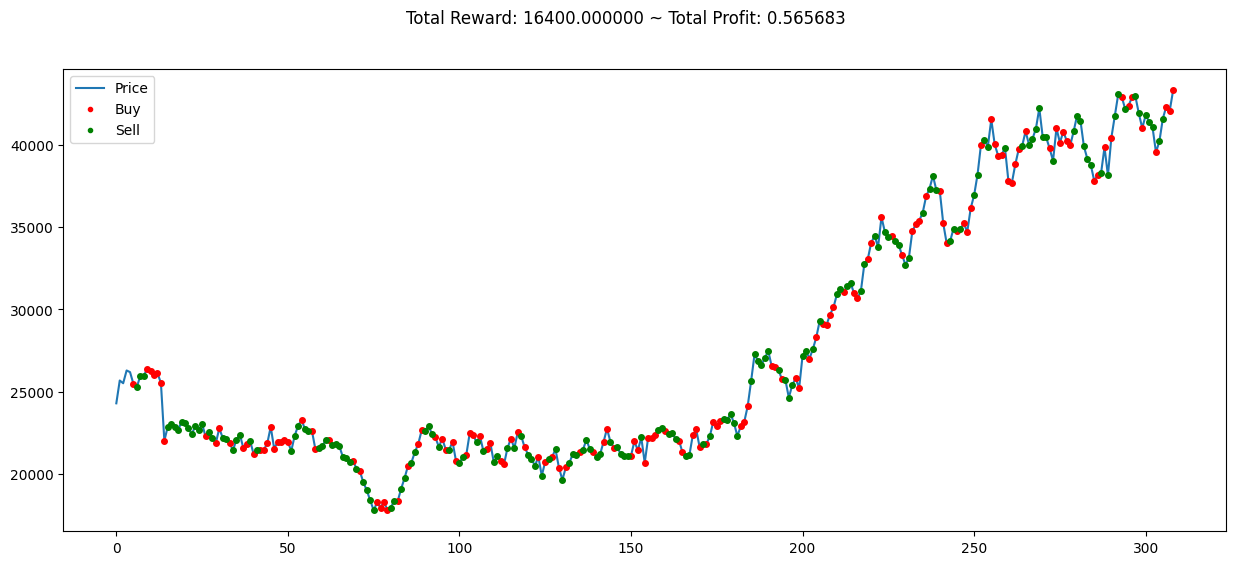

In [65]:
%matplotlib inline
import gym
import gym_anytrading
import gymnasium as gym
from gym_anytrading.envs import StocksEnv

import matplotlib.pyplot as plt

class CustomStocksEnv(StocksEnv):
    def render_all(self):
        # 凡例とマーカーサイズの調整を含むプロットを作成
        plt.figure(figsize=(15, 6))
        super().render_all()
        plt.legend(['Price', 'Buy', 'Sell'], markerscale=0.5)  # 凡例を追加
        plt.setp(plt.gca().get_lines(), markersize=4)  # マーカーサイズを調整


# 他にもデータ処理や可視化のために必要なライブラリをインポートします
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from datetime import datetime

# CSVファイルから株価データを読み込みます
df = yf.download("6920.T",start='2023-01-01',end = datetime.now(),interval="1d")
print(df.head())

# `gym-anytrading`に必要なカラム名に変更します
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Forex環境を構築しますが、株価予測にも同様に適用できます
# env = CustomStocksEnv(df=df, frame_bound=(10, len(df)), window_size=5)
env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)


state = env.reset()
# 取引情報を格納するリストを初期化
trades = []

while True:
    action = env.action_space.sample()  # ランダムな行動を選択
    next_state, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        print("Info:", info)
        break
    if 'total_reward' in info:
      trades.append(info)

print(f"trades:{trades}")
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()



# PPO

## pip

In [1]:
!pip install gym-anytrading
!pip install yfinance
!pip install 'stable-baselines3[extra]'
# !pip install stable-baselines3
# !pip install torch
!pip install gym-trading-env

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 8.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cu

## code

In [ ]:
import gym_anytrading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
# gymnasiumをインポート（gymの代わりに）
import gymnasium as gym

from tqdm import tqdm
import random

import numpy as np
import pandas as pd
import seaborn as sns

from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import A2C  # A2Cをインポート

import matplotlib.dates as mdates

import gym_trading_env

# 株価データの取得
df = yf.download("SPXL", start='2024-01-01', end=datetime.now(), interval="1d")
print(df.head())
print("*"*10)
r,c=df.shape
print(r,c)
print(f'len:{len(df)}')
# TradingEnv環境の作成

# TradingEnv環境の作成
# Dataframeの列名を小文字に変換
# df.rename(columns=lambda x: x.strip().lower(), inplace=True)
# env = gym.make('TradingEnv', df=df)
# env = gym.make('TradingEnv', df=df, frame_bound=(10, len(df)), window_size=5)
env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)
# env = DummyVecEnv([lambda: env])  # ベクトル化された環境の作成
# 環境の作成
# Parallel environments
# PPOモデルの作成
# model = A2C("MlpPolicy", env, verbose=1)

model = PPO("MlpPolicy", env, verbose=1)

# 学習の実行
model.learn(total_timesteps=100)

# 学習したモデルを使用して予測
obs = env.reset()
trades=[]
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, done, info = env.step(action)  # 'terminated' と 'truncated' を 'done' に置き換える
    print(f'action:{action}')
    print(f'action:{type(action)}')
    # # print(f'_states:{_states}')
    # # print(f'obs{obs}')
    # print(f'rewards{rewards}')
    # print(f'done{done}')
    # print(f'info{info}')
    trades.append(info)
    if done:  # 'terminated or truncated' を 'done' に置き換える
        print("info:", info)
        # At the end of the episode you want to render
        env.save_for_render(dir = "render_logs")
        break

from gym_trading_env.renderer import Renderer
renderer = Renderer(render_logs_dir="render_logs")
renderer.run()


print(f'*****trade:')
print(f'len trades:{len(trades)}')
for i in trades:
  print(i)

plt.figure(figsize=(15, 6))
plt.cla()
# env.render_all()
# 各環境の render メソッドを呼び出す
plt.show()

# dfを修正



# 株価データと取引情報をプロットする関数
def plot_stock_trades(df, trades):
    # 新しい図を作成
    plt.figure(figsize=(14, 7))

    # 株価の終値をプロット
    plt.plot(df.index, df['Close'], label='Close Price')

    # 取引タイミングをプロット
    for trade in trades:
        if trade['action'] == 1:  # 仮に1が買いを示すとする
            plt.scatter(trade['date'], trade['price'], color='green', label='Buy')
        elif trade['action'] == 0:  # 仮に0が売りを示すとする
            plt.scatter(trade['date'], trade['price'], color='red', label='Sell')

    # X軸のフォーマットを日付に設定
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # 30日ごとに日付を表示

    # グラフのタイトルとラベルを設定
    plt.title('Stock Price and Trades')
    plt.xlabel('Date')
    plt.ylabel('Price')

    # 凡例を表示
    plt.legend()

    # グリッドを表示
    plt.grid(True)

    # グラフを表示
    plt.show()

# 株価データと取引情報を渡してグラフをプロット
plot_stock_trades(df, trades)



In [41]:
import gym_anytrading
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
import yfinance as yf

# 株価データの取得
df = yf.download("AAPL", start="2020-01-01", end="2021-01-01")

# 環境の作成
env = gym.make('stocks-v0', df=df, frame_bound=(50, 100), window_size=10)
env = DummyVecEnv([lambda: env])  # ベクトル化された環境の作成

# PPOモデルの作成
model = PPO("MlpPolicy", env, verbose=1)

# 学習の実行
model.learn(total_timesteps=20000)

# 学習したモデルを使用して予測
env = gym.make('stocks-v0', df=df, frame_bound=(100, 150), window_size=10)
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info:", info)
        break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[*********************100%%**********************]  1 of 1 completed

Using cpu device


AttributeError: partially initialized module 'torch._dynamo' has no attribute 'external_utils' (most likely due to a circular import)